# Naive Bayes
---
- The Bayesian interpretation of probability is one's degreee of belief in A given some evidence B, which is the foundation for Bayes Theorem and classification modeling with Naive Bayes 


- Naive Bayes seeks to find the value that maximizes the posterior distribution. While the explanation of such is outside the scope of this notebook, essentially the model predicts class membership with the following steps : 
    - First, predicting probabilities of observations falling into each class
    - Second, picking the class that has the highest probability 
    

- In Scikit-Learn there are three Naive Bayes classifiers, which are fit based upon the distribution of features
    - For a binary event a Binomial distribution will be modeled
    - For experiments with > 2 discrete outcomes, a Multinomial distribution will be modeled
    - For continuous real valued features, a Gaussian distribution will be modeled

In [1]:
# Importing necessary libraries

# EDA
import pandas as pd
import seaborn as sns
import numpy as np

# Model Building
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

## Loading in the data - containing phrases and sentiments 

In [2]:
df = pd.read_table("train.csv", sep='\t', encoding="utf-8")  
df.head(5) 

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


## Performing some EDA

In [3]:
# Inspecting size 
len(df['Phrase'])

156060

In [4]:
# Subsetting dataframe for speedier calculations
df = df[:30000]

In [5]:
# Checking for balanced classes (predicting sentiment)
df['Sentiment'].value_counts()

2    16545
3     6011
1     4810
4     1529
0     1105
Name: Sentiment, dtype: int64

In [7]:
# Investigating word counts using countvectorizer

# Instantiating, fitting, & transforming cvec
cvec = CountVectorizer()
cvec.fit(df['Phrase'])
cvecdata = cvec.transform(df['Phrase'])

# Transforming countvectorizer features into dataframe & printing first 5 rows 
features = pd.DataFrame(cvecdata.todense(), columns = cvec.get_feature_names())
features.head(5)

,10,100,10th,12,120,13,1790,1899,1915,1920,...,youthful,zaza,zeal,zelda,zemeckis,zhuangzhuang,zingers,zip,zone,zoning
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


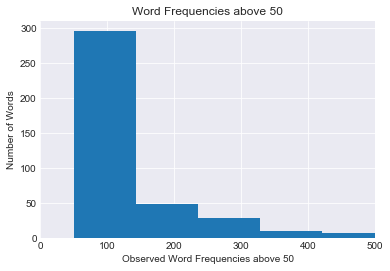

In [8]:
# Visualizing results by investigating word counts > 50

# Summing word counts & indexing to only include > 50 
word_counts = features.sum()
greater_than_50 = word_counts[word_counts >50]

# Plotting 
plt.hist(greater_than_50,bins=100);
plt.xlim(0,500);
plt.title('Word Frequencies above 50');
plt.ylabel('Number of Words');
plt.xlabel('Observed Word Frequencies above 50');

## Performing a Train-Test-Split 

In [ ]:
x = df2['Phrase']
y = df2['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)

## Setting up a Pipeline to Vectorize and use Naive Bayes Classifier_

In [ ]:
# Intantiating pipeline with nlp and multinomial model (more than 2 outcomes for sentiment) 
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words= 'english', strip_accents='ascii')), 
    ('tfidf', TfidfTransformer()),
    ('cls', MultinomialNB())
]) 

# Fitting pipeline on traiing data 
pipeline.fit(X_train, y_train)

# Making predictions on testing data 
preds = pipeline.predict(X_test)

# Printing classification report & score 
print(classification_report(y_test,preds))
print(pipeline.score(X_test,y_test))

In [ ]:
# Test - trying another NB classifier to see if it performs better
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words= 'english', strip_accents='ascii')), 
    ('tfidf', TfidfTransformer()),
    ('cls', BernoulliNB())
]) 

# Fitting pipeline on traiing data 
pipeline.fit(X_train, y_train)

# Making predictions on testing data 
preds = pipeline.predict(X_test)

# Printing classification report & score 
print(classification_report(y_test,preds))
print(pipeline.score(X_test,y_test))

In [ ]:
# Test - trying another Logistic Regression to see if it performs better
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words= 'english', strip_accents='ascii')), 
    ('tfidf', TfidfTransformer()),
    ('cls', LogisticRegression()),
]) 

# Fitting pipeline on traiing data 
pipeline.fit(X_train, y_train)

# Making predictions on testing data 
preds = pipeline.predict(X_test)

# Printing classification report & score 
print(classification_report(y_test,preds))
print(pipeline.score(X_test,y_test))